In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

# Reading and Initializing

In [2]:
df = pd.read_hdf(r"C:\Users\vjj14\Desktop\DeepLabCut\multi-diagonal-vj-2019-06-10\videos\diagonal1080p240fps_TrimDeepCut_resnet50_multi-diagonalJun10shuffle1_30001.h5")
#remove extra level "scorer"
df.columns = df.columns.droplevel()
df.head()

bodyparts     leftEye                               nose              \
coords              x           y likelihood           x           y   
0          331.064579  262.509875   0.988152  469.346648  460.900509   
1          330.585515  263.276449   0.986252  468.901771  461.842341   
2          329.447625  265.687315   0.970498  466.360386  464.228407   
3          327.880071  267.725319   0.979649  465.652474  466.173157   
4          328.126409  269.662511   0.990072  465.764715  467.997076   

bodyparts                   hand                              index  \
coords    likelihood           x           y likelihood           x   
0           0.994061  317.968819  493.064616   0.955051  332.377578   
1           0.996860  315.217863  491.947519   0.979382  331.808349   
2           0.997528  315.545722  492.007372   0.976342  332.089359   
3           0.996836  315.954294  493.867136   0.980207  332.923160   
4           0.997026  318.587152  491.670550   0.965005  333.519781   

bodyparts    ...         middle        ring                         \
coords       ...     likelihood           x           y likelihood   
0            ...       0.030956  330.725804  267.746470   0.033122   
1            ...       0.031755  330.815574  268.049594   0.029958   
2            ...       0.047653  330.376154  268.013651   0.038346   
3            ...       0.034627  329.765588  268.370421   0.026978   
4            ...       0.031279  458.980267  478.278642   0.033875   

bodyparts       pinky                             pellet              \
coords              x           y likelihood           x           y   
0          324.893178  510.845040   0.118548  334.489067  269.850945   
1          326.399165  512.029730   0.062423  333.883134  270.018268   
2          327.496909  511.212395   0.064501  333.503396  270.671923   
3          325.673337  512.227060   0.081225  334.066101  270.950899   
4          336.294533  513.439205   0.165606  332.552677  271.173792   

bodyparts             
coords    likelihood  
0           0.029727  
1           0.035835  
2           0.049036  
3           0.029051  
4           0.031113  

[5 rows x 24 columns]

In [3]:
df.describe()

bodyparts      leftEye                                   nose               \
coords               x            y   likelihood            x            y   
count      3824.000000  3824.000000  3824.000000  3824.000000  3824.000000   
mean        298.030422   338.549852     0.946013   428.665028   522.746868   
std          94.334820   233.734928     0.196046   124.257455   272.841902   
min          -1.923309     1.994571     0.017559    -0.133329     4.308095   
25%         217.295990   226.919893     0.985361   353.781831   429.244226   
50%         320.984722   289.095332     0.992309   461.840083   482.678488   
75%         348.351717   387.048422     0.995970   485.047035   533.089769   
max         805.917506  1918.109475     0.999552  1027.056381  1921.295711   

bodyparts                      hand                                  index  \
coords      likelihood            x            y   likelihood            x   
count      3824.000000  3824.000000  3824.000000  3824.000000  3824.000000   
mean          0.801029   312.324585   516.477019     0.766931   329.149471   
std           0.307140   119.719761   165.081872     0.358269   117.262304   
min           0.014788    -0.165105   113.670805     0.017187    -0.113954   
25%           0.762989   225.974747   452.737998     0.581151   264.542973   
50%           0.968742   316.164024   494.482459     0.984132   331.228223   
75%           0.990589   352.591593   542.986051     0.994048   376.649458   
max           0.998826  1018.285955  1920.272747     0.999591  1018.182034   

bodyparts     ...            middle         ring                            \
coords        ...        likelihood            x            y   likelihood   
count         ...       3824.000000  3824.000000  3824.000000  3824.000000   
mean          ...          0.435921   335.530763   509.367127     0.488388   
std           ...          0.395404   125.643158   121.803751     0.415026   
min           ...          0.008621     1.567510     4.329168     0.009262   
25%           ...          0.036545   254.000751   479.180825     0.039700   
50%           ...          0.293029   328.941772   504.827144     0.445439   
75%           ...          0.887745   393.368880   568.625827     0.941154   
max           ...          0.997186   661.964566  1917.787087     0.998812   

bodyparts        pinky                                 pellet               \
coords               x            y   likelihood            x            y   
count      3824.000000  3824.000000  3824.000000  3824.000000  3824.000000   
mean        314.014264   512.876957     0.122548   445.699290   522.160430   
std         124.648078   124.625095     0.172473   166.827036   227.084829   
min           1.242477     1.326354     0.009668     2.222582   175.090603   
25%         237.030515   480.937084     0.036157   332.088738   317.847394   
50%         322.177735   510.274868     0.061380   379.693004   523.894634   
75%         357.562346   562.473132     0.119280   608.877273   659.724786   
max         633.376541  1918.141732     0.995000  1038.993937  1917.255144   

bodyparts               
coords      likelihood  
count      3824.000000  
mean          0.410658  
std           0.438040  
min           0.012107  
25%           0.033187  
50%           0.054760  
75%           0.946182  
max           0.993218  

[8 rows x 24 columns]

In [4]:
def frame_to_time(frame):
    total_seconds = (frame/3824)*127
    return total_seconds
def time_to_frame(time):
    return 3824*(time/127)

In [5]:
labels = {key: df[df[key, 'likelihood'] > 0.6][key] for key in list(df.columns.levels[0])}
{labels[key].insert(0, "frame", labels[key].index, True) for key in labels.keys()}
{labels[key].insert(0, "time", labels[key]['frame'].map(frame_to_time), True) for key in labels.keys()}
pellet = labels['pellet']
hand = labels['hand']
index = labels['index']
middle = labels['middle']
ring = labels['ring']
pinky = labels['pinky']
nose = labels['nose']
leftEye = labels['leftEye']
pellet.plot(kind='scatter', x='x', y='y')
hand.plot(kind='scatter', x='x', y='y')
nose.plot(kind='scatter', x='x', y='y')

### example of what a success looks like

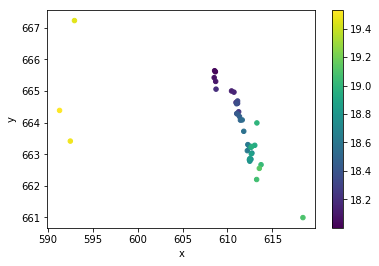

In [6]:
a_success = pellet[(pellet['time'] > 18) & (pellet['time'] < 22)]
a_success.plot(kind='scatter', x='x', y='y', c=a_success['time'], colormap='viridis', sharex=False)

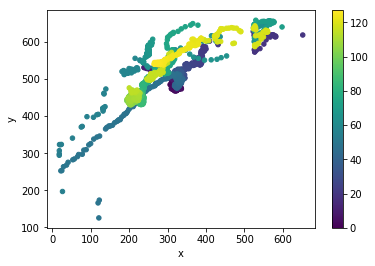

In [7]:
hand = labels['hand']
hand.plot(kind='scatter', x='x', y='y', c=hand['time'], colormap='viridis', sharex=False)

# Isolating attempts
### Used an line: if the hand/fingers pass the line, it is an attempt

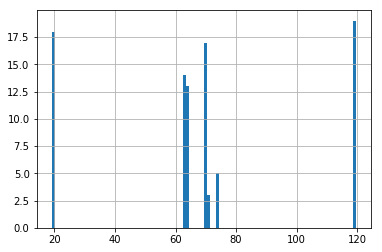

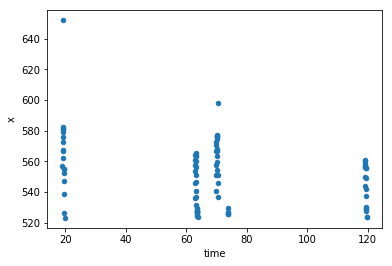

In [8]:
hand_reach = hand[hand.apply(lambda x: x['y'] > ((-638/878)*x['x'] + 1000), axis=1)]
# hand_reach.plot(kind='scatter', x='x', y='y', c=hand_reach['time'], colormap='viridis', sharex=False)
hand_reach['time'].hist(bins=100)
hand_reach.plot(kind='scatter', x='time', y='x')

### Added a distance from pellet dispensing position: if a hand is within a certain distance (90 pixels here), it is an attempt

C:\Users\vjj14\.conda\envs\dlc-windowsGPU\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


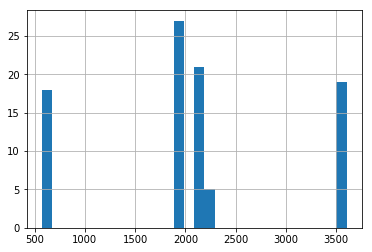

In [9]:
def dist_from_dispenser(x, y):
    return ((x-600)**2 + (y-670)**2)**0.5
hand['d_from_dispenser'] = hand.apply(lambda row: dist_from_dispenser(x = row['x'], y = row['y']), axis=1)
hand_reach2 = hand[hand['d_from_dispenser'] < 90.1]
hand_reach2['frame'].hist(bins=30)

# Trying to see finger spread

In [10]:
lkh = 0.4
all_finger = df[(df['index', 'likelihood'] > lkh) & (df['middle', 'likelihood'] > lkh) & (df['ring', 'likelihood'] > lkh) & (df['pinky', 'likelihood'] > lkh)]
all_finger.describe()

bodyparts     leftEye                                 nose               \
coords              x            y  likelihood           x            y   
count      178.000000   178.000000  178.000000  178.000000   178.000000   
mean       324.886144   358.429025    0.843754  417.011281   547.007166   
std        139.719293   407.522769    0.330372  208.316906   479.601301   
min         -0.950225    13.808448    0.021803    1.226948     5.057628   
25%        257.338197   113.240408    0.966650  384.972240   319.544989   
50%        352.093569   229.554836    0.983932  471.983699   486.740653   
75%        381.271781   379.969435    0.992569  563.780034   511.011188   
max        646.778714  1866.448138    0.999122  835.183619  1917.895181   

bodyparts                    hand                               index  \
coords     likelihood           x           y  likelihood           x   
count      178.000000  178.000000  178.000000  178.000000  178.000000   
mean         0.556219  269.308233  516.213556    0.812530  304.635863   
std          0.375276  165.661383  116.325686    0.254854  177.116302   
min          0.015586    2.825864  243.560160    0.086405   53.436694   
25%          0.190810  229.859835  402.752220    0.758288  151.839930   
50%          0.536467  249.520914  568.406168    0.943157  295.637614   
75%          0.976686  259.442234  590.073181    0.984312  298.288101   
max          0.995640  652.124409  651.007419    0.998184  653.369447   

bodyparts     ...          middle        ring                          \
coords        ...      likelihood           x           y  likelihood   
count         ...      178.000000  178.000000  178.000000  178.000000   
mean          ...        0.827200  292.933150  562.027068    0.886276   
std           ...        0.142240  177.515961  120.446309    0.108482   
min           ...        0.415841   49.989796  288.062339    0.430733   
25%           ...        0.746069  149.271545  437.652962    0.838059   
50%           ...        0.870977  274.731840  621.993171    0.911149   
75%           ...        0.948891  285.972636  627.217424    0.974306   
max           ...        0.994656  657.575350  704.739766    0.998731   

bodyparts       pinky                              pellet              \
coords              x           y  likelihood           x           y   
count      178.000000  178.000000  178.000000  178.000000  178.000000   
mean       259.880536  554.057332    0.692807  522.833089  658.073198   
std        165.358049  127.079013    0.163155  136.057299   75.516494   
min         34.324840  166.979424    0.402826  224.842815  187.909006   
25%        130.774749  430.545776    0.570333  433.238471  625.754696   
50%        242.629797  614.643894    0.681204  607.182767  667.254964   
75%        245.673808  619.656996    0.820658  617.385968  708.427440   
max        589.153500  707.522385    0.995000  663.193663  740.155546   

bodyparts              
coords     likelihood  
count      178.000000  
mean         0.642661  
std          0.289657  
min          0.022037  
25%          0.421252  
50%          0.716633  
75%          0.921905  
max          0.975595  

[8 rows x 24 columns]

C:\Users\vjj14\.conda\envs\dlc-windowsGPU\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


bodyparts frame     leftEye                               nose              \
coords                    x           y likelihood           x           y   
576         576  383.594581  373.288370   0.997343  560.473152  493.999619   
577         577  383.222801  371.563633   0.995388  562.899114  493.119970   
578         578  384.028888  372.096202   0.995799  562.919186  493.733319   
583         583  381.321818  371.088487   0.992712  568.188372  487.405372   
584         584  381.428136  374.448953   0.991321  568.996868  486.735728   

bodyparts                   hand                            ...       \
coords    likelihood           x           y likelihood     ...        
576         0.991205  556.645643  605.269211   0.983851     ...        
577         0.991689  567.319237  612.886802   0.997060     ...        
578         0.992080  575.682908  618.879099   0.888841     ...        
583         0.989360  652.124409  618.373772   0.910354     ...        
584         0.986084  572.816251  619.063977   0.939528     ...        

bodyparts        ring                              pinky              \
coords              x           y likelihood           x           y   
576        610.624513  656.391115   0.729184  582.993076  658.385011   
577        627.129634  674.939909   0.958870  583.695639  673.740555   
578        640.557799  687.643307   0.965614  589.153500  679.839467   
583        635.304246  685.565730   0.981028  582.719622  678.597255   
584        635.786632  676.075787   0.996480  577.893967  673.673631   

bodyparts                 pellet                              spread  
coords    likelihood           x           y likelihood               
576         0.659740  613.547574  662.549953   0.763436  2339.388703  
577         0.893615  617.324400  671.743406   0.133348  2379.984166  
578         0.925547  617.789979  677.711568   0.145994  2404.879674  
583         0.977672  604.732680  671.349653   0.595290  2414.632736  
584         0.995000  606.142887  669.382219   0.576901  2376.284738  

[5 rows x 26 columns]

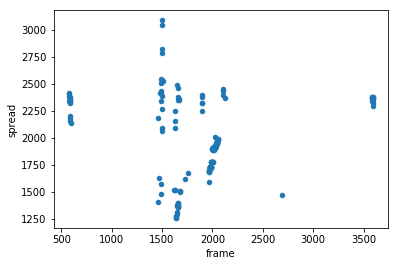

In [11]:
all_finger = df[(df['index', 'likelihood'] > lkh) & (df['middle', 'likelihood'] > lkh) & (df['ring', 'likelihood'] > lkh) & (df['pinky', 'likelihood'] > lkh)]
def spread(row):
    row = row.values
    array = np.delete(row, 11)
    array = np.delete(array, 8)
    array = np.delete(array, 5)
    array = np.delete(array, 2)
    differences = np.diff(array)
    return (sum(array**2))**0.5
all_finger['spread'] = all_finger.apply(lambda row: spread(row), axis=1)
# all_finger.sort_values('spread', ascending=False).head()
all_finger.insert(0, "frame", all_finger.index, True)
all_finger.plot(kind='scatter', x = 'frame', y='spread')
all_finger.head()

In [12]:
frame_to_time(500)

16.605648535564853

### trying to see the difference between two network's analyzation of the same video (incomplete)

(700, 100)

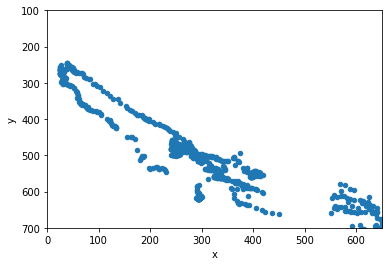

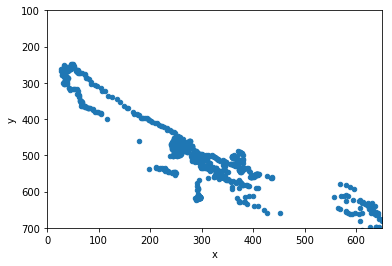

In [13]:
df2 = pd.read_hdf(r"C:\Users\vjj14\Desktop\DeepLabCut\multi-diagonal-vj-2019-06-10\videos\diagonal1080p240fps_TrimDeepCut_resnet50_multi-diagonalJun10shuffle1_30000.h5")
#remove extra level "scorer"
df2.columns = df2.columns.droplevel()
labels2 = {key: df2[df2[key, 'likelihood'] > 0.6][key] for key in list(df2.columns.levels[0])}
{labels2[key].insert(0, "frame", labels2[key].index, True) for key in labels2.keys()}
{labels2[key].insert(0, "time", labels2[key]['frame'].map(frame_to_time), True) for key in labels2.keys()}
pellet2 = labels2['pellet']
hand2 = labels2['hand']
index2 = labels2['index']
middle2 = labels2['middle']
ring2 = labels2['ring']
pinky2 = labels2['pinky']
nose2 = labels2['nose']
leftEye2 = labels2['leftEye']
p=middle.plot(kind='scatter', x='x', y='y')
p.set_xlim(0, 650)
p.set_ylim(700, 100)
p2=middle2.plot(kind='scatter', x='x', y='y')
p2.set_xlim(0, 650)
p2.set_ylim(700, 100)


In [14]:
hand.describe()

coords,time,frame,x,y,likelihood,d_from_dispenser
count,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000
mean,64.439810,1940.297902,290.339685,499.416751,0.967919,354.917647
std,37.468241,1128.177581,84.163926,56.674501,0.062906,96.523794
min,0.000000,0.000000,17.819953,125.562503,0.600351,28.123555
25%,31.940965,961.750000,223.891142,455.489414,0.977758,312.316199
50%,67.668018,2037.500000,291.183818,493.691471,0.990471,342.001345
75%,96.586755,2908.250000,330.986578,531.468259,0.995266,433.803070
max,126.966789,3823.000000,652.124409,658.131703,0.999591,743.754686
